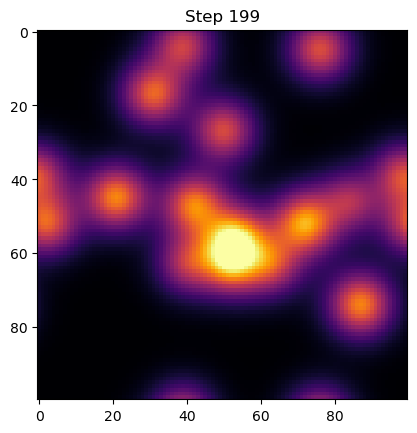

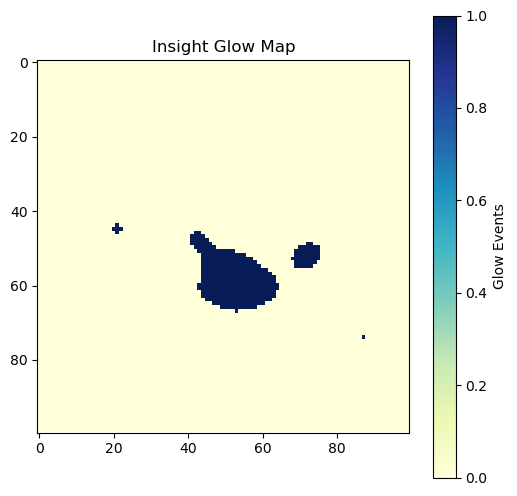

In [1]:
# 🧠 Simulation: Fractal Learning Patchfield
# ------------------------------------------------------------
# Visualizes how understanding emerges from scattered curiosity,
# memory, decay, and local relational reinforcement.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# --- Parameters ---
grid_size = 100          # 100x100 conceptual grid
steps = 200              # time steps
alpha = 0.2              # curiosity diffusion rate
beta = 0.1               # memory strength
decay = 0.01             # forgetting rate
glow_threshold = 2.5     # insight threshold

# --- Initialize Field and Glow Map ---
R = np.zeros((steps, grid_size, grid_size))  # relational field over time
glow_map = np.zeros((grid_size, grid_size))  # where understanding "glows"

# --- Initial Seeding: Curiosity Pulse ---
np.random.seed(42)
seed_points = np.random.choice(grid_size**2, 15, replace=False)
for idx in seed_points:
    x, y = divmod(idx, grid_size)
    R[0, x, y] = np.random.uniform(1, 2)

# --- Laplacian: Local relational influence ---
def laplacian(Z):
    return (
        -4 * Z +
        np.roll(Z, 1, axis=0) + np.roll(Z, -1, axis=0) +
        np.roll(Z, 1, axis=1) + np.roll(Z, -1, axis=1)
    )

# --- Evolution Loop ---
for t in range(1, steps):
    current = R[t - 1]
    mem = np.sum(R[:t], axis=0) * beta / t  # weighted memory
    diffusion = alpha * laplacian(current)
    
    R[t] = current + diffusion + mem - decay * current

    # Insight glow: when node crosses threshold
    glow_map += (R[t] > glow_threshold) & (R[t - 1] <= glow_threshold)

# --- Animation Setup ---
fig, ax = plt.subplots()
im = ax.imshow(R[0], cmap='inferno', vmin=0, vmax=glow_threshold + 1)
plt.title("Fractal Learning Patchfield")

def update(frame):
    im.set_array(R[frame])
    ax.set_title(f"Step {frame}")
    return [im]

ani = animation.FuncAnimation(fig, update, frames=steps, interval=80, blit=True)

# --- Save animation as GIF ---
ani.save("learning_patchfield_evolution.gif", writer='pillow', fps=10)

# --- Show animation inline ---
plt.show()

# --- Glow Map: Insight History ---
plt.figure(figsize=(6, 6))
plt.imshow(glow_map, cmap='YlGnBu')
plt.title("Insight Glow Map")
plt.colorbar(label="Glow Events")

# --- Save static glow map ---
plt.savefig("learning_patchfield_glow_map.png", dpi=300)
plt.show()
